In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
from matplotlib.cm import ScalarMappable
%matplotlib widget

import importlib
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

import ExperimentClass
import tools
import math_functions as mf


In [3]:
importlib.reload(ExperimentClass)
importlib.reload(tools)
importlib.reload(mf)

<module 'math_functions' from 'c:\\Users\\Orlando\\Desktop\\DREAM_repo\\math_functions.py'>

In [4]:
list_path = "C:/Users/Orlando/ownCloud - ORLANDO Marcelo@mycore.cnrs.fr/Doutorado/Dados experimentais/PSI/00_experiments_lists/"
exp_list = pd.read_csv(list_path + "DTT_exp_list.csv", sep=";", decimal=",")
exp_list

,Name,tot_time,DTT_time,A_volt,Background,Strain,Label
0,20241108_test_DTT_Pt1_11,25,14.8,NaN,Pt1,Pt1-11,VDE + +
1,20241108_test_DTT_Pt2,20,9.8,NaN,Pt2,Pt2,WT
2,20241112_DTT_Pt1-11,15,4.8,NaN,Pt1,Pt1-11,VDE + +
3,20241113_DTT_Pt1-43,15,4.8,NaN,Pt1,Pt1-43,ZEP3 +
4,20241118_DTT_Pt1_1,15,5.1,34.8,Pt1,Pt1-1,WT
5,20241115_test_DTT_Pt1_1,15,5.1,NaN,Pt1,Pt1-1,WT
6,20241119_DTT_Pt1_26,15,5.1,NaN,Pt1,Pt1-26,ZEP3 - -
7,20241120_DTT_Pt1_27,15,5.1,35.4,Pt1,Pt1-27,ZEP3 + +
8,20241121_DTT_Pt1-43,15,5.1,35.3,Pt1,Pt1-43,ZEP3 +


In [5]:
exp_list.Name[0]

'20241108_test_DTT_Pt1_11'

In [6]:
experiments = []
for i in exp_list.index:
    exp = ExperimentClass.Experiment(exp_list.Name[i],"PSI", DataType=".csv", sep = ';')
    experiments.append(exp)

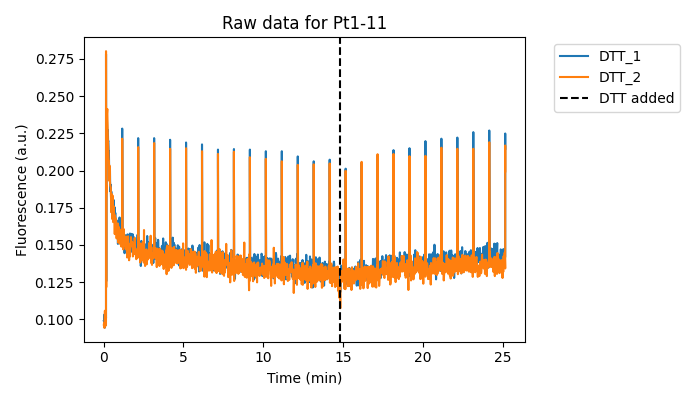

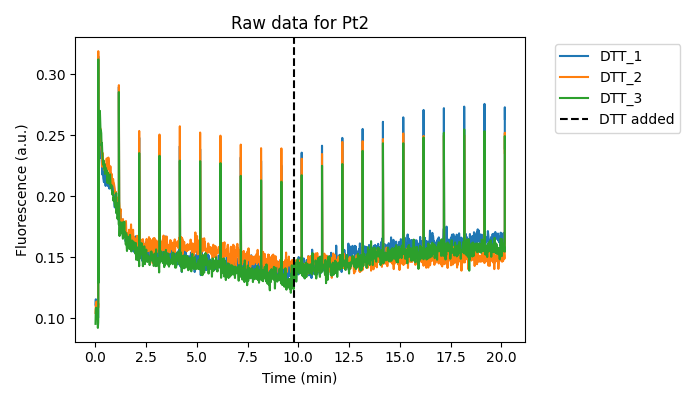

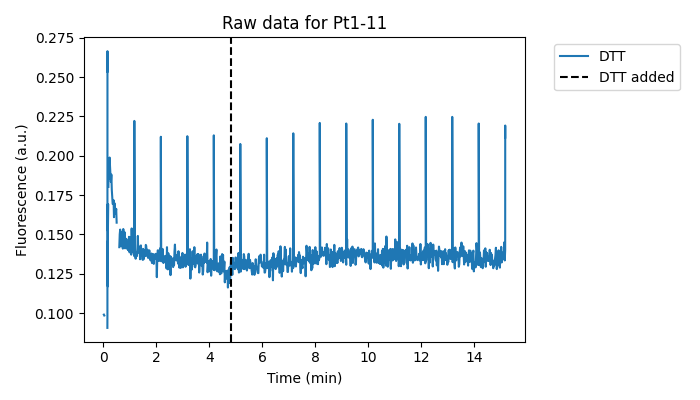

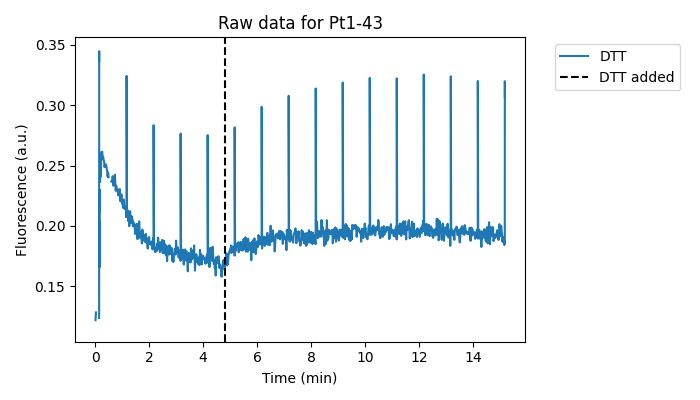

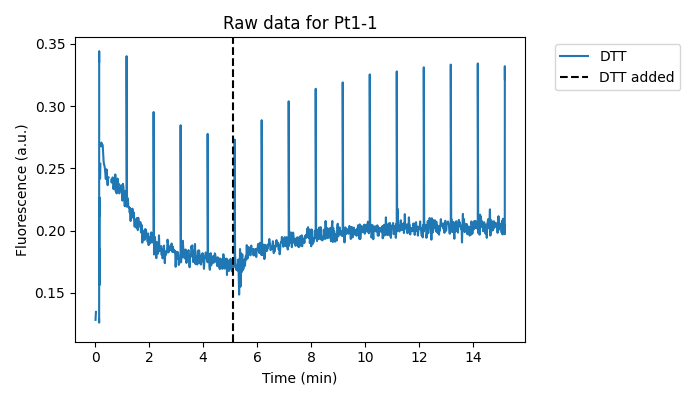

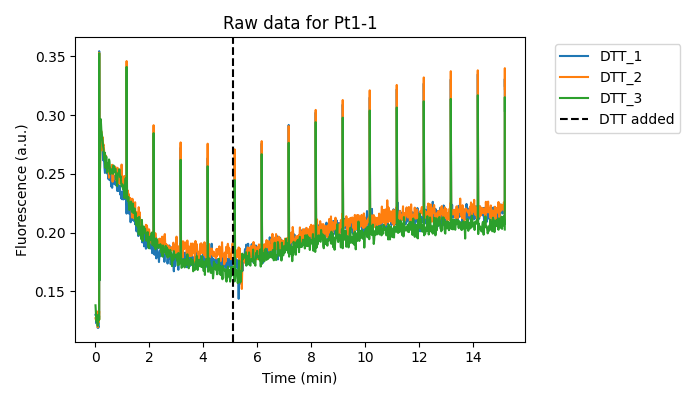

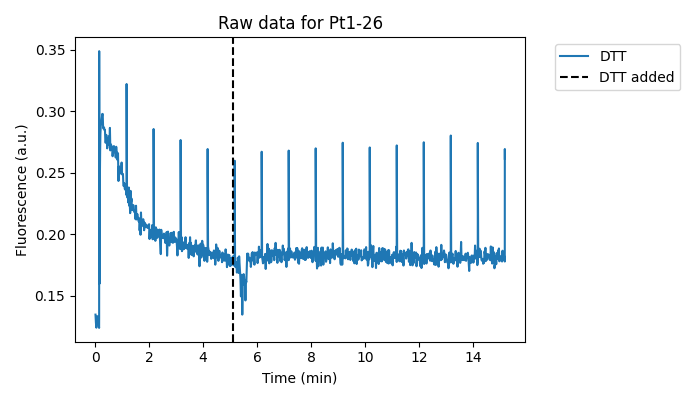

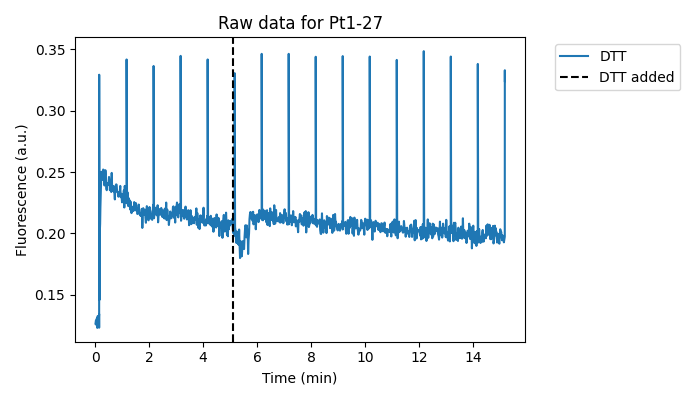

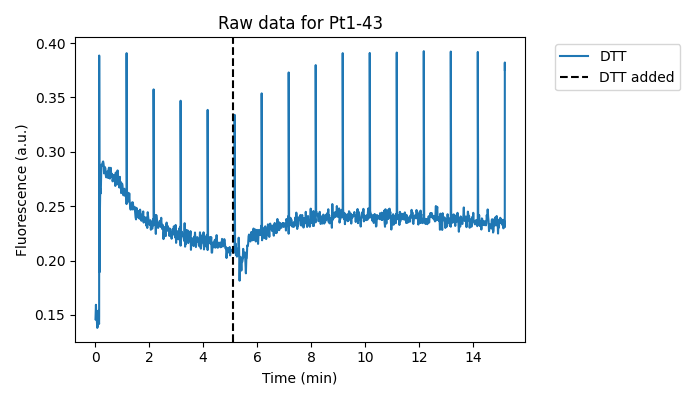

In [7]:

for k, manip in enumerate(experiments):
    fig, ax = plt.subplots(figsize = (7, 4))
    for i in manip.records[::-1]:
        if "DTT" in i:
            ax.plot(manip.Time/60, manip.Data[i], label = i)
    ax.axvline(x= exp_list.DTT_time[k], color = 'k', linestyle = '--', label = 'DTT added')
    ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')


    ax.set_xlabel("Time (min)")
    ax.set_ylabel("Fluorescence (a.u.)")
    ax.set_title(f"Raw data for {exp_list.Strain[k]}")

    fig.tight_layout()



In [8]:
def compute_params(Experiment_df):
    
    t_F0 = [0, 9]                  # time interval for F0 calculation in seconds
    t_Fstat = [-6, -0.5]              # time interval for Fstat calculation in seconds RELATIVE TO F_MAX!!!
    t_Fmax = [0.1, 0.12]       # time interval for Fmax_OJ calculation in seconds RELATIVE TO F_MAX!!!
    
    F_max = []
    F_stat = []
    NPQ = []
    phi_stat = []
    times_Fmax = []

    for i, k in enumerate(Experiment_df.records[::-1]):
        aux_F_max = []
        aux_F_stat = []
        aux_NPQ = []
        aux_phi_stat = []
        total_time = Experiment_df.Time.values[-1]
        times_Fmax.append(np.array([9.1] + list(np.arange(70, total_time, 60))))        
        for j, t in enumerate(times_Fmax[-1]):
            aux_F_max.append(np.mean(Experiment_df.Data[k][np.where(Experiment_df.Time>= t_Fmax[0] + t)[0][0] :np.where(Experiment_df.Time>= t_Fmax[1] + t)[0][0]]))
            aux_F_stat.append(np.mean(Experiment_df.Data[k][np.where(Experiment_df.Time>= t_Fstat[0] + t)[0][0] :np.where(Experiment_df.Time>= t_Fstat[1] + t)[0][0]]))
            aux_NPQ.append((aux_F_max[0] - aux_F_max[j])/aux_F_max[j])
            aux_phi_stat.append((aux_F_max[j] - aux_F_stat[j])/aux_F_max[j])

        F_max.append(np.array(aux_F_max)/aux_F_max[0])
        F_stat.append(np.array(aux_F_stat)/aux_F_max[0])
        NPQ.append(np.array(aux_NPQ))
        phi_stat.append(np.array(aux_phi_stat))

    
    return times_Fmax, F_max, F_stat, NPQ, phi_stat
    

In [9]:

times_Fmax, F_max, F_stat, NPQ, phi_stat = compute_params(manip)

times_Fmax = []
F_max = []
F_stat = []
NPQ = []
phi_stat = []

for manip in experiments:
    aux_times_Fmax, aux_F_max, aux_F_stat, aux_NPQ, aux_phi_stat = compute_params(manip)
    times_Fmax.append(aux_times_Fmax)
    F_max.append(aux_F_max)
    F_stat.append(aux_F_stat)
    NPQ.append(aux_NPQ)
    phi_stat.append(aux_phi_stat)
    


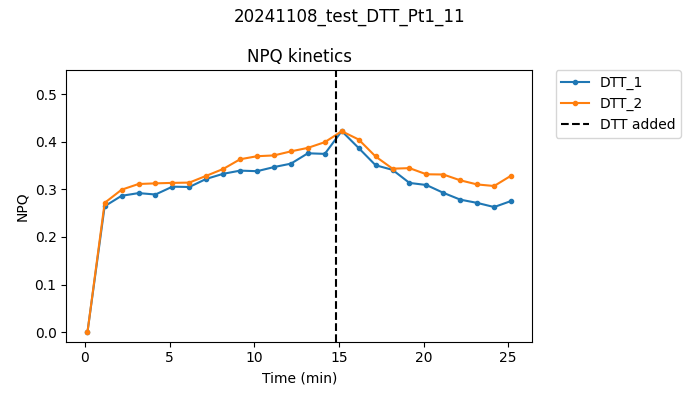

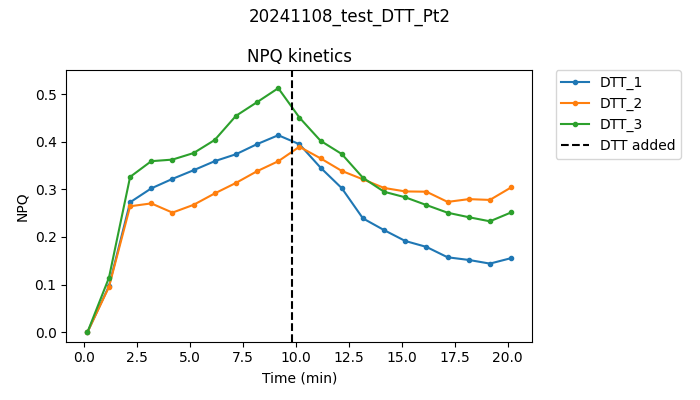

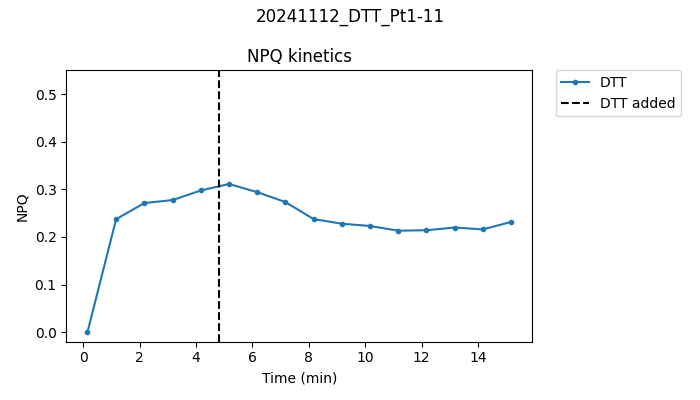

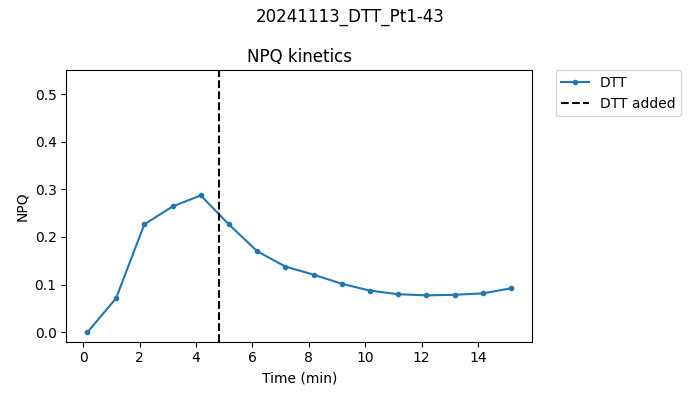

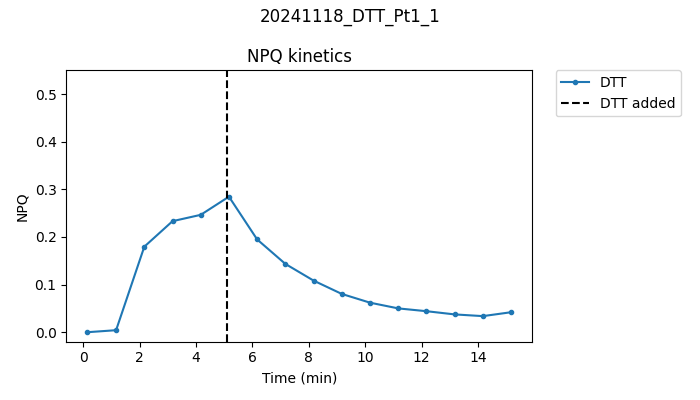

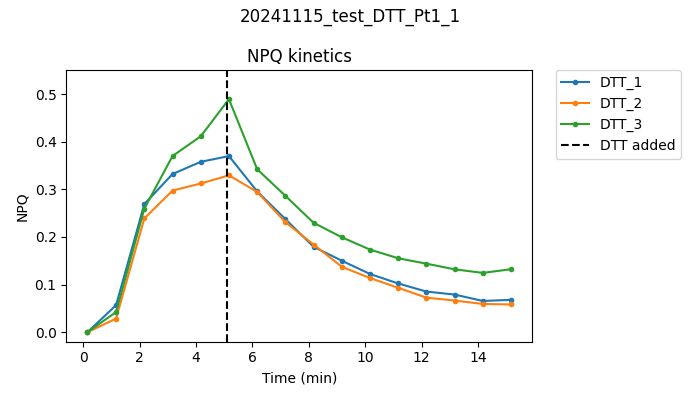

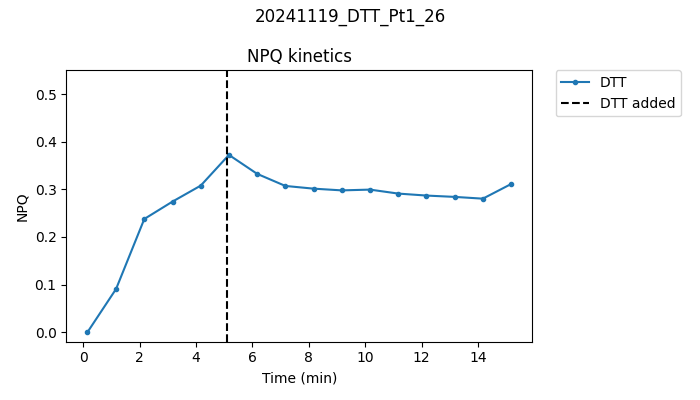

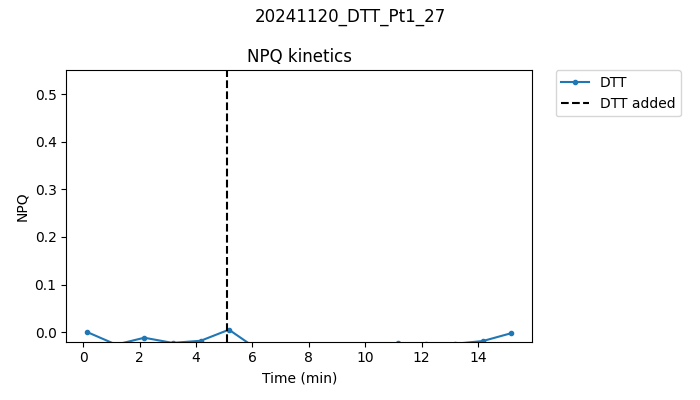

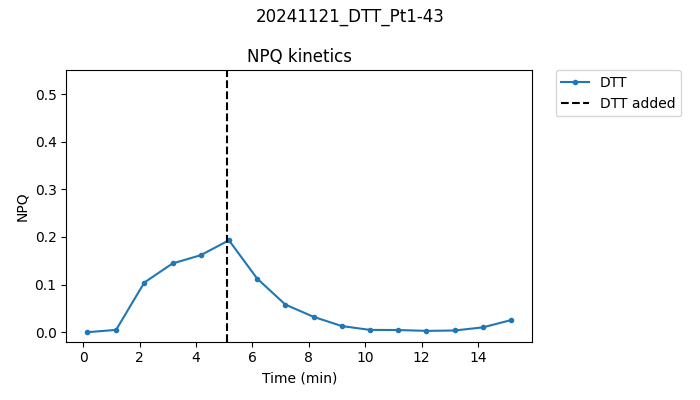

In [10]:
for j, manip in enumerate(experiments):
    fig, ax = plt.subplots(figsize = (7,4))
    fig.suptitle(f"{exp_list.Name[j]}")
    for i, k in enumerate(manip.records[::-1]):
        if "DTT" in k:
            ax.plot(times_Fmax[j][i]/60, NPQ[j][i], 'o-',label = k, markersize = 3)

    ax.axvline(x= exp_list.DTT_time[j], color = 'k', linestyle = '--', label = 'DTT added')
    ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    ax.set_xlabel("Time (min)")
    ax.set_ylabel("NPQ")
    ax.set_title(f"NPQ kinetics")
    ax.set_ylim(-0.02, 0.55)
    fig.tight_layout()


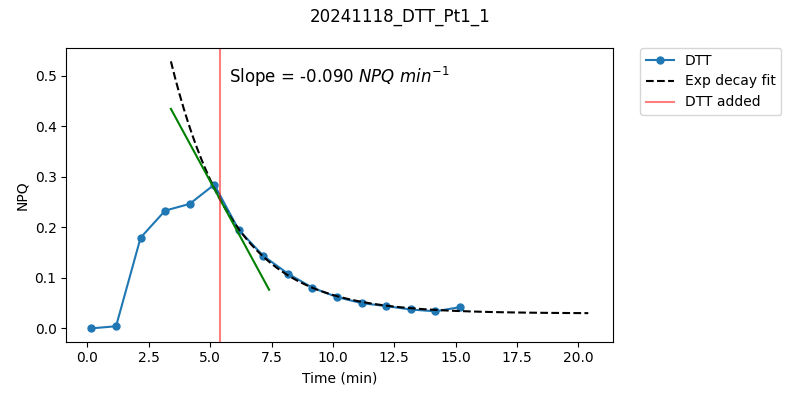

In [ ]:
name = "20241118_DTT_Pt1_1"

exp_index = exp_list[exp_list.Name == name].index[0]

exp = ExperimentClass.Experiment(name,"PSI", DataType=".csv", sep = ';')

times_Fmax, F_max, F_stat, NPQ, phi_stat = compute_params(exp)

start_fit = 6

fig, ax = plt.subplots(figsize = (8,4))
fig.suptitle(f"{name}")
for i, k in enumerate(exp.records[::-1]):
    if "DTT" in k:
        ax.plot(times_Fmax[i]/60, NPQ[i], 'o-',label = k, markersize = 5)
        xdata = times_Fmax[i][start_fit:]/60 - exp_list.DTT_time[exp_index]
        ydata = NPQ[i][start_fit:]
        popt, xfit, yfit = tools.exp_decay_fit(xdata, ydata, -2, 15, 100, p0 = [-0 ,  2,  0.25])
        ax.plot(xfit + exp_list.DTT_time[exp_index], yfit, 'k--', label = "Exp decay fit")
        slope = popt[0]/popt[1]
    

ax.text(0.5, 0.9, f"Slope = {slope:.3f} $NPQ$ $min^{{-1}}$", horizontalalignment='center', verticalalignment='center', transform=ax.transAxes, fontsize = 12)
ax.axvline(x= exp_list.DTT_time[exp_index], color = 'red', linestyle = '-', label = 'DTT added', alpha = 0.5)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
ax.set_xlabel("Time (min)")
ax.set_ylabel("NPQ")
fig.tight_layout()
    







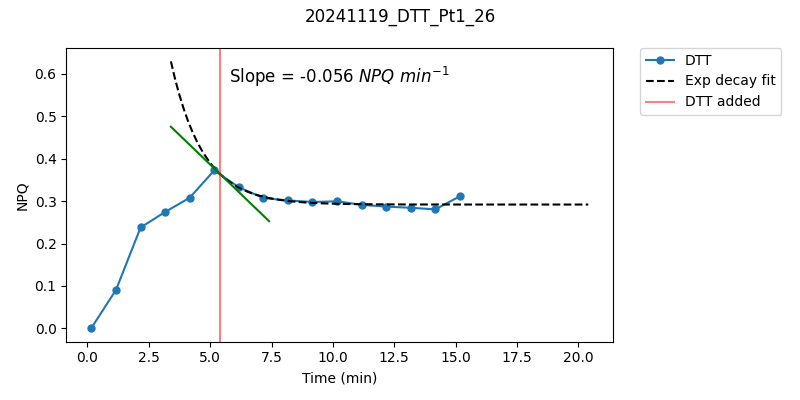

In [100]:
name = "20241119_DTT_Pt1_26"

exp_index = exp_list[exp_list.Name == name].index[0]

exp = ExperimentClass.Experiment(name,"PSI", DataType=".csv", sep = ';')

times_Fmax, F_max, F_stat, NPQ, phi_stat = compute_params(exp)

start_fit = 6

fig, ax = plt.subplots(figsize = (8,4))
fig.suptitle(f"{name}")
for i, k in enumerate(exp.records[::-1]):
    if "DTT" in k:
        ax.plot(times_Fmax[i]/60, NPQ[i], 'o-',label = k, markersize = 5)
        xdata = times_Fmax[i][start_fit:]/60 - exp_list.DTT_time[exp_index]
        ydata = NPQ[i][start_fit:]
        popt, xfit, yfit = tools.exp_decay_fit(xdata, ydata, -2, 15, 100, p0 = [-0 ,  2,  0.25])
        ax.plot(xfit + exp_list.DTT_time[exp_index], yfit, 'k--', label = "Exp decay fit")
        slope = popt[0]/popt[1]
        x_slope = np.linspace(-2, 2, 10)
        y_slope = slope*x_slope + popt[2]
        ax.plot(x_slope + exp_list.DTT_time[exp_index], y_slope, 'green')
    

ax.text(0.5, 0.9, f"Slope = {slope:.3f} $NPQ$ $min^{{-1}}$", horizontalalignment='center', verticalalignment='center', transform=ax.transAxes, fontsize = 12)
ax.axvline(x= exp_list.DTT_time[exp_index], color = 'red', linestyle = '-', label = 'DTT added', alpha = 0.5)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
ax.set_xlabel("Time (min)")
ax.set_ylabel("NPQ")
fig.tight_layout()
    






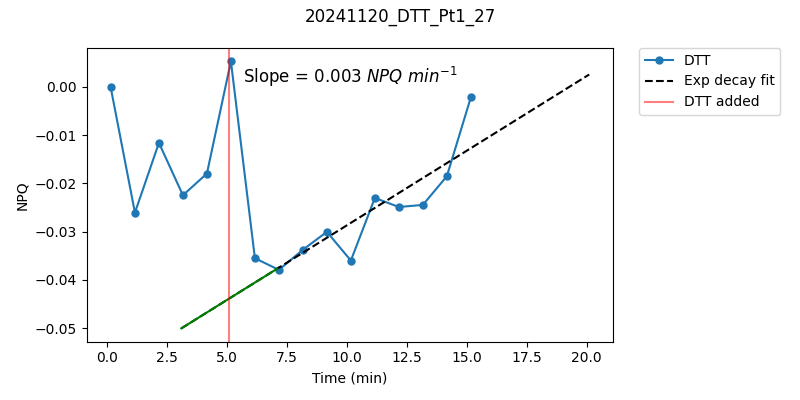

In [11]:
name = "20241120_DTT_Pt1_27"

exp_index = exp_list[exp_list.Name == name].index[0]

exp = ExperimentClass.Experiment(name,"PSI", DataType=".csv", sep = ';')

times_Fmax, F_max, F_stat, NPQ, phi_stat = compute_params(exp)

start_fit = 6

fig, ax = plt.subplots(figsize = (8,4))
fig.suptitle(f"{name}")
for i, k in enumerate(exp.records[::-1]):
    if "DTT" in k:
        ax.plot(times_Fmax[i]/60, NPQ[i], 'o-',label = k, markersize = 5)
        xdata = times_Fmax[i][start_fit:]/60 - exp_list.DTT_time[exp_index]
        ydata = NPQ[i][start_fit:]
        popt, xfit, yfit = tools.exp_decay_fit(xdata, ydata, -2, 15, 100, p0 = [-0 ,  2,  0.25])
        ax.plot(xfit + exp_list.DTT_time[exp_index], yfit, 'k--', label = "Exp decay fit")
        slope = popt[0]/popt[1]
        x_slope = np.linspace(-2, 2, 10)
        y_slope = slope*x_slope + popt[2]
        ax.plot(x_slope + exp_list.DTT_time[exp_index], y_slope, 'green')
    

ax.text(0.5, 0.9, f"Slope = {slope:.3f} $NPQ$ $min^{{-1}}$", horizontalalignment='center', verticalalignment='center', transform=ax.transAxes, fontsize = 12)
ax.axvline(x= exp_list.DTT_time[exp_index], color = 'red', linestyle = '-', label = 'DTT added', alpha = 0.5)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
ax.set_xlabel("Time (min)")
ax.set_ylabel("NPQ")
fig.tight_layout()
    


C:\Users\Orlando\AppData\Local\Temp\ipykernel_5156\3974825954.py:11: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(figsize = (8,4))


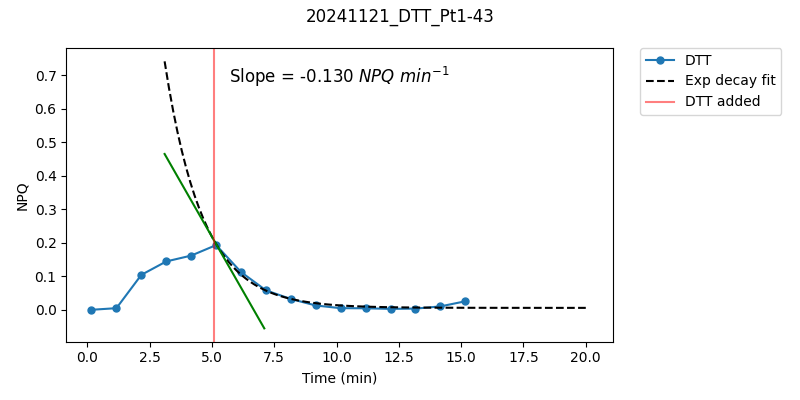

In [13]:
name = "20241121_DTT_Pt1-43"

exp_index = exp_list[exp_list.Name == name].index[0]

exp = ExperimentClass.Experiment(name,"PSI", DataType=".csv", sep = ';')

times_Fmax, F_max, F_stat, NPQ, phi_stat = compute_params(exp)

start_fit = 5

fig, ax = plt.subplots(figsize = (8,4))
fig.suptitle(f"{name}")
for i, k in enumerate(exp.records[::-1]):
    if "DTT" in k:
        ax.plot(times_Fmax[i]/60, NPQ[i], 'o-',label = k, markersize = 5)
        xdata = times_Fmax[i][start_fit:]/60 - exp_list.DTT_time[exp_index]
        ydata = NPQ[i][start_fit:]
        popt, xfit, yfit = tools.exp_decay_fit(xdata, ydata, -2, 15, 100, p0 = [-0 ,  2,  0.25])
        ax.plot(xfit + exp_list.DTT_time[exp_index], yfit, 'k--', label = "Exp decay fit")
        slope = popt[0]/popt[1]
        x_slope = np.linspace(-2, 2, 10)
        y_slope = slope*x_slope + popt[2]
        ax.plot(x_slope + exp_list.DTT_time[exp_index], y_slope, 'green')
    

ax.text(0.5, 0.9, f"Slope = {slope:.3f} $NPQ$ $min^{{-1}}$", horizontalalignment='center', verticalalignment='center', transform=ax.transAxes, fontsize = 12)
ax.axvline(x= exp_list.DTT_time[exp_index], color = 'red', linestyle = '-', label = 'DTT added', alpha = 0.5)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
ax.set_xlabel("Time (min)")
ax.set_ylabel("NPQ")
fig.tight_layout()
    
